### 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 2. Importing dataset

In [2]:
titanic = pd.read_csv('tested.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 3. Exploratory data analysis

In [3]:
print('Total number of passengers: {}'.format(titanic.shape[0]))

Total number of passengers: 418


In [4]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.NaN, strategy= 'mean')
imputer.fit(titanic[['Age']])
titanic[['Age']] = imputer.fit_transform(titanic[['Age']])
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

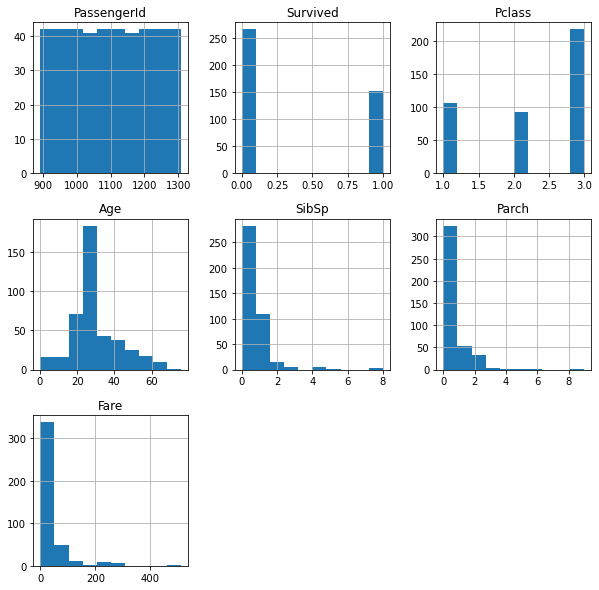

In [9]:
titanic.hist(figsize = (10,10))

### 4. Data visualisation

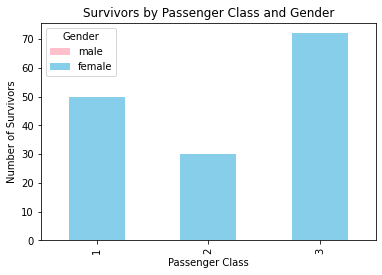

In [10]:
# Group the data by passenger class and gender and count the number of survivors
grouped = titanic.groupby(['Pclass', 'Sex'])['Survived'].sum().unstack()

# Create a stacked bar chart
ax = grouped.plot(kind='bar', stacked=True, color=['skyblue', 'pink'])

# Set the chart title and axis labels
ax.set_title('Survivors by Passenger Class and Gender')
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Number of Survivors')

# Add a legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Gender')

# Show the plot
plt.show()

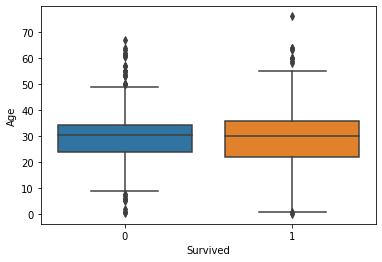

In [11]:
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.show()

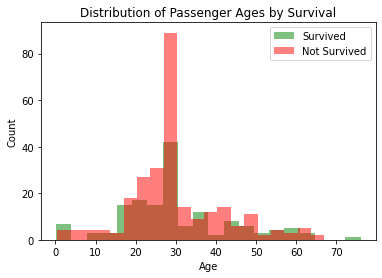

In [12]:
# Create two subsets of data: survivors and non-survivors
survived = titanic[titanic['Survived'] == 1]
not_survived = titanic[titanic['Survived'] == 0]

# Create two histograms with different colors for survivors and non-survivors
plt.hist(survived['Age'], bins=20, alpha=0.5, label='Survived', color='green')
plt.hist(not_survived['Age'], bins=20, alpha=0.5, label='Not Survived', color='red')

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Passenger Ages by Survival')
plt.legend(loc='upper right')

# Show the plot
plt.show()

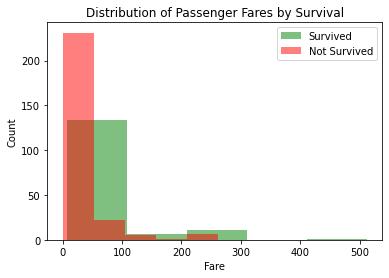

In [13]:
# Create two histograms with different colors for survivors and non-survivors
plt.hist(survived['Fare'], bins=5, alpha=0.5, label='Survived', color='green')
plt.hist(not_survived['Fare'], bins=5, alpha=0.5, label='Not Survived', color='red')

# Add labels and legend
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Distribution of Passenger Fares by Survival')
plt.legend(loc='upper right')

# Show the plot
plt.show()

In [14]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S


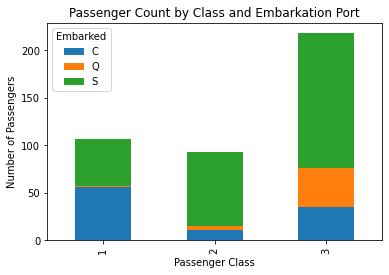

In [15]:
# Create a pivot table with counts of passengers by class and embarkation port
pivot_df = titanic.pivot_table(index='Pclass', columns='Embarked', values='PassengerId', aggfunc='count')

# Plot the stacked bar chart
pivot_df.plot(kind='bar', stacked=True)

# Set the axis labels and plot title
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.title('Passenger Count by Class and Embarkation Port')

# Show the plot
plt.show()